In [1]:
from oldModel import OrientationWei, sensory_noise_dist, sensory_noise_dist_sample
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.integrate import simpson, trapezoid
import numpy as np
from scipy.interpolate import UnivariateSpline, interp1d

In [2]:
import riskModel as model

In [3]:
theta0 = np.linspace(0.001, 1.99*np.pi, 100)

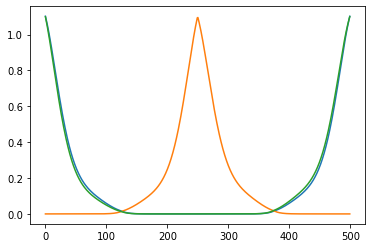

In [4]:
plt.plot((model.get_thetahat_dist(theta0 ,sigma_stim = 0.05*np.pi, sigma_rep = 0.05))[0, ...])
plt.plot((model.get_thetahat_dist(theta0 ,sigma_stim = 0.05*np.pi, sigma_rep = 0.05))[50, ...])
plt.plot((model.get_thetahat_dist(theta0 ,sigma_stim = 0.05*np.pi, sigma_rep = 0.05))[99, ...])

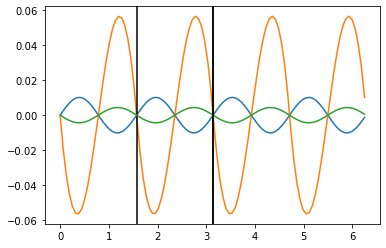

In [5]:
E_theta_given_theta0 = model.expected_thetahat_theta0(theta0, 0.5, 0.01)
plt.plot(theta0, theta0 - E_theta_given_theta0)

E_theta_given_theta0 = model.expected_thetahat_theta0(theta0, 0.01, 0.05)
plt.plot(theta0, theta0 - E_theta_given_theta0)
plt.axvline(np.pi, c='k')
plt.axvline(0.5*np.pi, c='k')


E_theta_given_theta0 = model.expected_thetahat_theta0(theta0, 0.75, 0.05)
plt.plot(theta0, theta0 - E_theta_given_theta0)
plt.axvline(np.pi, c='k')

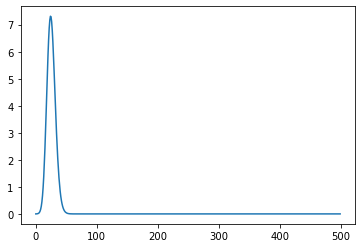

In [7]:
plt.plot((model.get_thetahat_dist(theta0 ,sigma_stim, sigma_rep))[0, ...])

In [8]:
v = model.safe_value_dist(0.5*np.pi, sigma_stim, sigma_rep , model.value_function1, bins=1000)

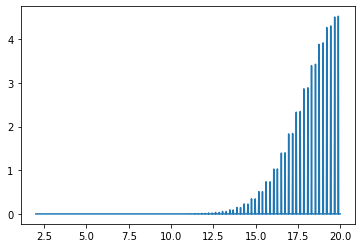

In [9]:
plt.plot(v[0],v[1][0,:])

In [15]:
risky_value, risky_prob = model.risky_value_dist(0.5*np.pi, sigma_stim, sigma_rep , model.value_function1, risk_prob = 0.5, bins=1000) 

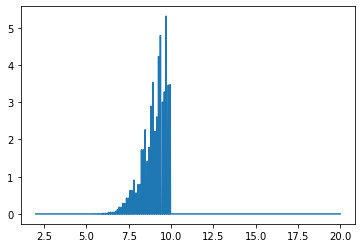

In [16]:
plt.plot(risky_value,risky_prob[0,:])